# Word Frequency in Classic Novels
## Data Analysis Project by Daniel Weatherspoon

### Information
The purpose of this project is to analyze the word frequency in a classic novel. In order to do this, we must do some web scraping, text processing, and frequency analysis. We will be using some uncommon python libraries to achieve this:

- **requests**: for making HTTP requests.
- **BeautifulSoup**: for web scraping.
- **nltk**: for natural language processing.
- **Counter**: for counter word frequencies.


In [2]:
# imports

import requests
import nltk 
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Retrieving Content from the Web
The **requests** library is used for fetching content of a webpage. We are getting content from *Project Gutenburg* which is a webpage that gives access to free literature. The request we are making today is the URL of W.E.B. Du Bois' novel, *'The Souls of Black Folk.'*


In [3]:
req = requests.get('https://www.gutenberg.org/cache/epub/408/pg408-images.html')
req.encoding = 'utf-8' # Handles character encoding issues

html = req.text
#Print out a snippet to see if it worked
print(html[1000:1500]) 

dent: -4em;
    margin-left: 4em;
    margin-top: 1em;
    margin-bottom: 0;
    font-size: medium
}
#pg-header #pg-header-authlist {
    all: initial;
    margin-top: 0;
    margin-bottom: 0;
}
#pg-header #pg-machine-header strong {
    font-weight: normal;
}
#pg-header #pg-start-separator, #pg-footer #pg-end-separator {
    margin-bottom: 3em;
    margin-left: 0;
    margin-right: auto;
    margin-top: 2em;
    text-align: center
}

    .xhtml_center {text-align: center; 


### Data Cleaning 
Getting the HTML content of the webpage was not the end goal for the data. We will use **BeautifulSoup** to parse the HTML content, extracting the text. 

In [4]:
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()

There are sections of the web page that I don't want to include. I have to remove sections using slicing and don't want any publication information.

In [5]:
print(text.index('The Forethought', 1000)) #Beginning
print(text.index('The Afterthought', 3000)) #End

1470
405502


In [6]:
text = text[1470 : 405502] #Extract the text

### Extracting the Words
Now it is time to tokenize the text into words, this is breaking down into individual units. 

In [7]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
tokens = tokenizer.tokenize(text)
tokens[:15] #First 15 words starting with 'The Forethought'. Success!

['The',
 'Forethought',
 'Herein',
 'lie',
 'buried',
 'many',
 'things',
 'which',
 'if',
 'read',
 'with',
 'patience',
 'may',
 'show',
 'the']

- Make all words lowercase to ensure that words like 'The' and 'the' are counted as the same word, and preventing errors in word count.

In [8]:
words_lower = [token.lower() for token in tokens]
print(words_lower[:15]) #First 15 words starting with 'The Forethought' in lowercase. Success!

['the', 'forethought', 'herein', 'lie', 'buried', 'many', 'things', 'which', 'if', 'read', 'with', 'patience', 'may', 'show', 'the']


### Remove stop words
Stop words are words that occur very frequently and are not informative. This includes words like: the, and, a, of. The nltk library comes with a full list of stop words.

In [9]:
from nltk.corpus import stopwords
stop = stopwords.words('english') #Stopwords in English

words = [word for word in words_lower if word not in stop]
words[:15] #First 15 words starting with 'The Forethought' in lowercase and without stopwords. Success!

['forethought',
 'herein',
 'lie',
 'buried',
 'many',
 'things',
 'read',
 'patience',
 'may',
 'show',
 'strange',
 'meaning',
 'black',
 'dawning',
 'twentieth']

### Analyzing Frequency of Words
This is done with Counter, we will chose the 15 most common words.

In [10]:
count = Counter(words)
fifteen = count.most_common(15)
fifteen #The 15 most common words in the text. Success!

[('negro', 284),
 ('black', 278),
 ('one', 228),
 ('men', 208),
 ('world', 180),
 ('life', 173),
 ('south', 165),
 ('white', 157),
 ('day', 156),
 ('little', 151),
 ('land', 142),
 ('new', 133),
 ('man', 131),
 ('must', 125),
 ('work', 119)]

### Visualizing Results
To visualize the word frequency, I will be using a word cloud. This will make a picture of the words and larger words will have showed up more frequently than the words that are sized smaller. We can also plot the frequency distribution to see the numbers of words on a plot.

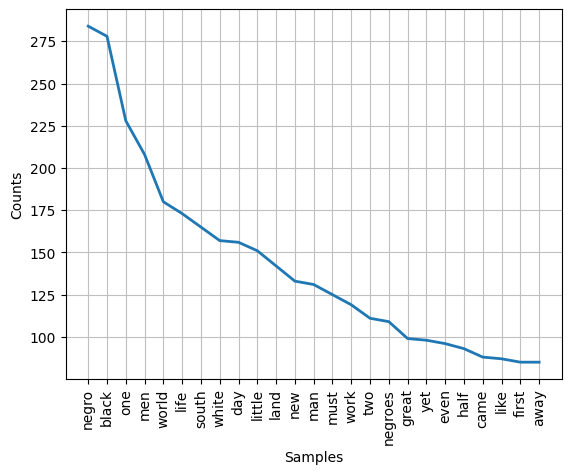

<Axes: xlabel='Samples', ylabel='Counts'>

In [13]:
freq = nltk.FreqDist(words)
freq.plot(25, cumulative=False) #Frequency distribution of the 25 most common words. Success!

In [11]:
#Making a list of top 25 words for word cloud.
top25 = count.most_common(25)
tops = []

for i in range(25):
    tops.append(top25[i][0])

tops

['negro',
 'black',
 'one',
 'men',
 'world',
 'life',
 'south',
 'white',
 'day',
 'little',
 'land',
 'new',
 'man',
 'must',
 'work',
 'two',
 'negroes',
 'great',
 'yet',
 'even',
 'half',
 'came',
 'like',
 'first',
 'away']

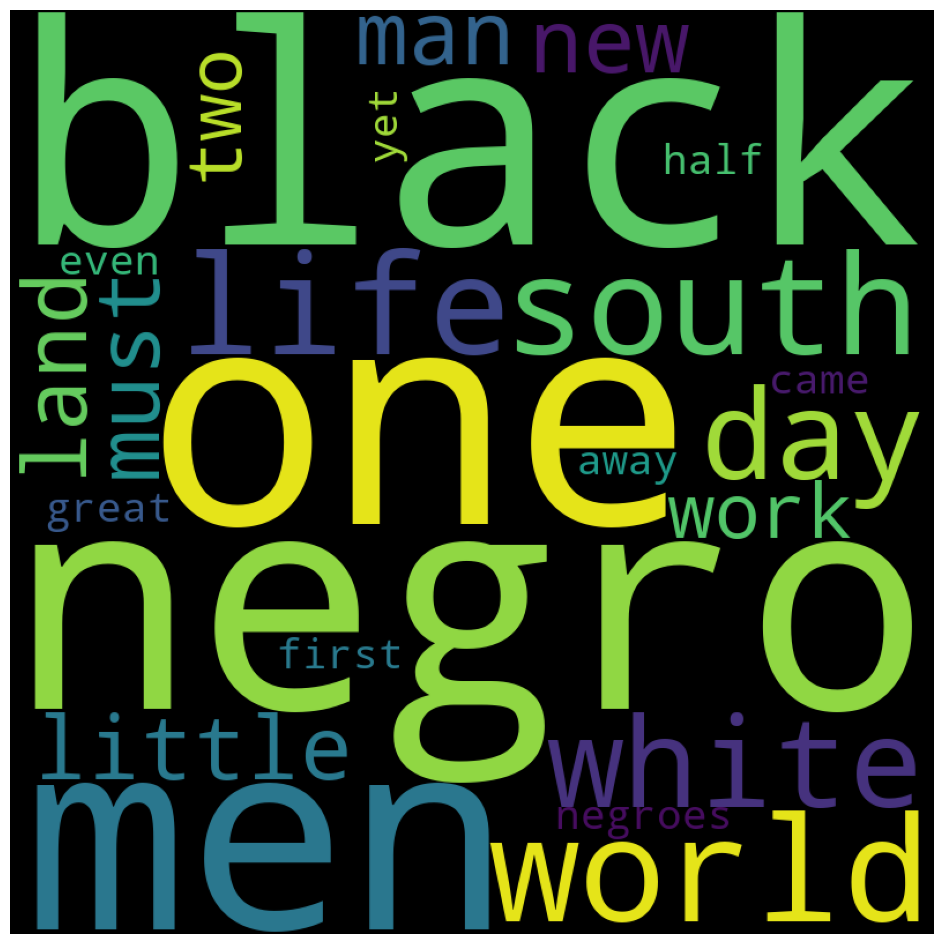

In [12]:
joiner = (" ").join(tops)
cloud = WordCloud(width = 800, height = 800).generate(joiner)
plt.figure(figsize = (15, 12))
plt.imshow(cloud)
plt.axis('off')
plt.show() #Word cloud of the top 25 words in the text. Success!

### Results
The word cloud is a visual that highlights the words that show up the most in W.E.B. Du Bois' novel "The Souls of Black Folk."
- This is helpful for identifying keywords which give insight to main themes in a novel. 
- You could create two different word clouds for two different pieces of text and do comparative analysis to show patterns and trends in them.
- Helpful for content analysis as well, like summarizing large volumes of text by highlighting the most important terms.